# Predicting Adolescent Drug Use with Machine Learning

<div style="text-align:center"><img src='img/stopdrugs.png'/></div>

#### Author: [Jamie Dowat](mailto:jamie_dowat44@yahoo.com)

***********
#### The drug problem in the United States is widespread and growing:

> [Mortality rates](https://jamanetwork.com/journals/jama/article-abstract/2674665) from drug use disorders increased nationally and in every county between 1980 and 2014, but the relative increase varied from 8.2% to 8369.7%.

************
> No suprise, but more and more research is showing the level of damage drugs do to the brain. Check out this diagram from Amen Clinics:

<div style="text-align:center"><img src='img/amenbrain.png'/></div>

************

> [**Adolescents**](https://www.drugabuse.gov/news-events/news-releases/2021/03/younger-age-of-first-cann[…]ssociated-with-faster-development-of-substance-use-disorders) are especially vulnerable. After a year since first use of drugs:
        * 11.2% of adolescents had prescription opioid use disorder versus 6.9% of young adults. 
        * 13.9% of adolescents had prescription stimulant use disorder versus 3.9% of young adults. 
        * 11.2% of adolescents had prescription tranquilizer use disorder versus 4.7% of young adults.
        
***********        

> The author of the above study on adolescents noted: ***“This [study] underscores the importance of drug use prevention and screening for substance use or misuse among adolescents and young adults. Offering timely treatment and support to young people who need it must be a public health priority.”***

***********

## POTENTIAL STAKEHOLDER & DEPLOYMENT:

In terms of real-life value, this model mirrors much of the work being done by the NIDA and SAMHSA. This model has potential to serve as a barometer for high schools, who can implement the survey anonymously and gain some high-level data about the state of their school and be able to more precisely analyze trends amongst their students and measure their prevention efforts against any changes seen in the model.

## DATA: [Monitoring the Future](www.monitoringthefuture.org)

<p float="right">
    <img src="img/nida.png" width="100" />
    <img src="img/mtf.png" width="100" />
    <img src="img/samhsa.png" width="100" />
</p>


Monitoring the Future began in 1975 as an attempt to collect and study drug use and feelings toward drug use amongst adolescents (8th-12th). This project specifically focuses on survey responses from 12th graders (since data for younger cohorts was not all open source), totaling to approximately 360,000 high school seniors across 133 schools nationwide.
For more information about the design and implementation of the study, click [here](http://monitoringthefuture.org/purpose.html).
About 6 different forms of the survey are distributed, each with slightly different questions.

**Questions** in this dataset are limited to the following:
* Demographic information
* Drug Use Information

To download the dataset used in this notebook, click [here](https://www.kaggle.com/jamiedowat/monitoring-the-future-12th-grade-drug-use-survey).

## MODELING:

The following models were implemented, along with [Boruta feature selection](https://towardsdatascience.com/boruta-explained-the-way-i-wish-someone-explained-it-to-me-4489d70e154a) and Bayesian Optimization.
* Logistic Regression
* Decision Trees
* Random Forests
* XGBoost

The **final model** produced an accuracy of ___ and a recall of ___

**Recall** was given extra attention as a metric, since false negatives (predicting no drug use when drug use is present) are predictions that would potentially cause the most harm.

***********


## Data Exploration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
survey = pd.read_csv('data/modeling_data/mtf.csv')

In [3]:
survey.head()

,yr_adminst,sampling_weight,region,msa,smsa,siblings,evr_smoked_cig,cig_month_freq,evr_drink,alcohol_lifetime_freq,...,hgh_yr_freq,pwd_alc_yr_freq,hookah_month_freq,evr_vape,vape_marj_lifetime_freq,vape_marj_yr_freq,vape_marj_month_freq,vape_flav_lifetime_freq,vape_flav_yr_freq,vape_flav_month_freq
0,1995,0.6,Midwest,1,1,1,Never,None,Unknown,0,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
1,1995,0.6,West,0,1,2,Regularly Now,2+ Packs,Unknown,40+,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
2,1995,0.9,Midwest,0,1,1,Regularly Now,2 Packs,Unknown,40+,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
3,1995,0.6,South,0,0,3+,Never,None,Unknown,0,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
4,1995,0.9,Midwest,1,1,None,Never,None,Unknown,0,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


In [3]:
from src import eda

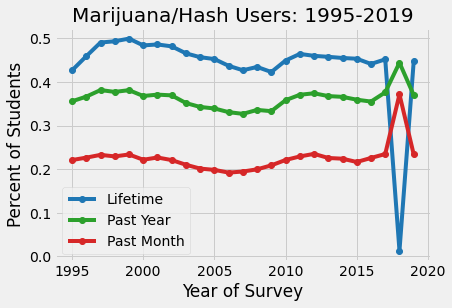

In [6]:
eda.marijuana_use_by_year(survey)

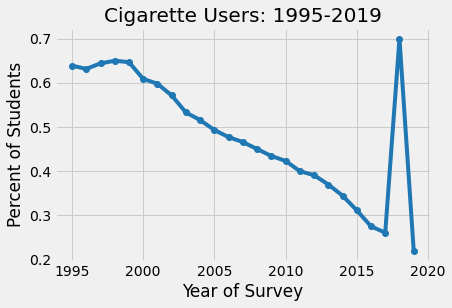

In [4]:
eda.cigarette_use_by_year(survey)

In [5]:
survey[survey['yr_adminst']==2018]['evr_smoked_cig'].value_counts()

Unknown         14482
Occasionally        7
1-2x                7
Never               6
Name: evr_smoked_cig, dtype: int64

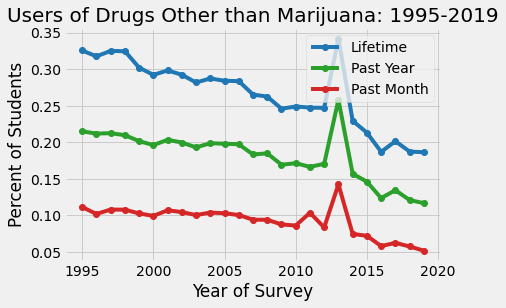

In [7]:
eda.other_drug_use_by_year(survey)

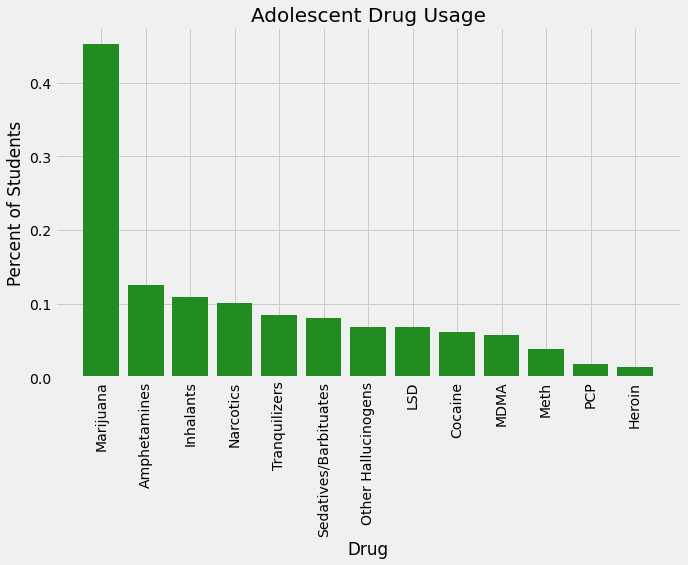

In [8]:
eda.drug_popularity(survey)

## Modeling

In [3]:
data = pd.read_csv('data/modeling_data/mtf_with_target.csv')

In [4]:
data.head()

,yr_adminst,sampling_weight,region,msa,smsa,evr_smoked_cig,cig_month_freq,alcohol_lifetime_freq,alcohol_yr_freq,alcohol_2weeks,...,work_hrs,work_pay,other_income,rec_time,date_freq,drive_freq,12mo_r_tcktd,12mo_accidents,num_drugs_yr,binary_drug
0,1995,0.6,Midwest,1,1,Never,None,0,0,None,...,30+,126-175,0,4-5,2-3x Month,51-100,0,0,0,0
1,1995,0.6,West,0,1,Regularly Now,2+ Packs,40+,40+,10+X,...,5 or less,21-35,126-175,<1,Never,1-10,0,0,9,1
2,1995,1.8,South,1,1,Never,None,3-5X,3-5X,None,...,11-15,51-75,6-10,2,1x Month,11-50,0,1,0,0
3,1995,0.9,South,0,1,1-2x,None,40+,6-9X,Once,...,0,0,0,2,2-3x Month,51-100,0,0,1,1
4,1995,0.9,NorthEast,0,1,Never,None,0,0,None,...,0,0,11-20,2,Never,51-100,0,1,0,0


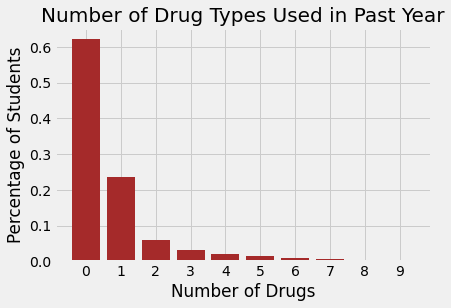

In [11]:
eda.number_of_drugs_used_past_year(data)

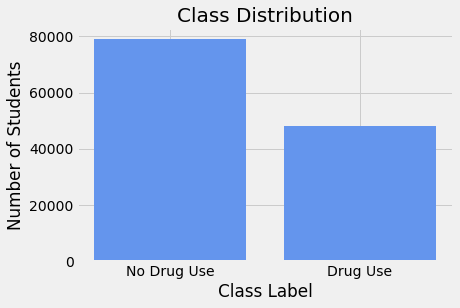

In [12]:
eda.class_distribution(data)

In [4]:
from src.modeling import drug_cols
data.drop(drug_cols, axis=1, inplace=True)

In [5]:
X = data.drop('binary_drug', axis=1)
y = data.binary_drug

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

For plotting confusion matrices:

In [8]:
X_tr_pp = pd.read_csv('data/modeling_data/X_tr_pp.csv')
y_tr_pp = pd.read_csv('data/modeling_data/y_tr_pp.csv')

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [10]:
from src.modeling import ModelHistory

In [11]:
history = ModelHistory(X_train, y_train, X_test, y_test)

***********
### First Simple Model

In [12]:
fsm_lr = LogisticRegression(max_iter=10000, C=0.1)

In [13]:
val_recall, val_prec, val_acc, roc_auc, lr1 = history.kfold_validation(fsm_lr, 'LogReg 1 AllFeatures', ['sampling_weight'], X_train.drop('sampling_weight', axis=1).columns)


In [14]:
from sklearn.metrics import plot_confusion_matrix

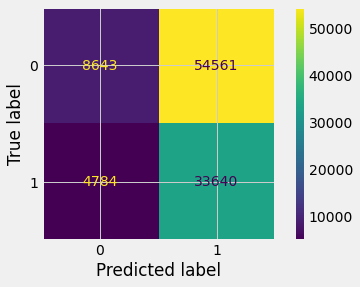

In [15]:
plot_confusion_matrix(lr1, X_tr_pp, y_tr_pp)

In [16]:
fsm_dt = DecisionTreeClassifier()

In [17]:
val_recall, val_prec, val_acc, roc_auc, dt1 = history.kfold_validation(fsm_dt, 'DecTree 1 AllFeatures', ['sampling_weight'], X_train.drop('sampling_weight', axis=1).columns)

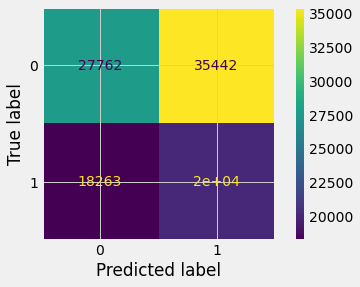

In [18]:
plot_confusion_matrix(dt1, X_tr_pp, y_tr_pp)

In [19]:
fsm_rf = RandomForestClassifier()

In [20]:
val_recall, val_prec, val_acc, roc_auc, rf1 = history.kfold_validation(fsm_rf, 'RandFor 1 AllFeatures', ['sampling_weight'], X_train.drop('sampling_weight', axis=1).columns)

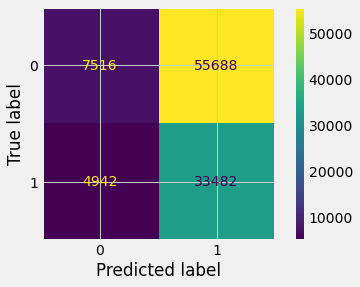

In [21]:
plot_confusion_matrix(rf1, X_tr_pp, y_tr_pp)

***********
### GridSearch

In [11]:
from sklearn.model_selection import GridSearchCV

##### Logistic Regression

In [12]:
lr = LogisticRegression(max_iter=10000, C=0.1)

In [13]:
grid = {'penalty': ['l1', 'l2', 'elasticnet'],
       'tol': [0.0001, 0.00005, 0.00001],
       'class_weight': [{0:0.7, 1:1}, None]}

In [14]:
lrgs = GridSearchCV(lr, grid)

In [15]:
val_recall, val_prec, val_acc, roc_auc, lr2 = history.kfold_validation(lrgs, 'LogReg 2 AllFeatures', ['sampling_weight'], X_train.drop('sampling_weight', axis=1).columns)


In [23]:
lr2.best_params_

{'class_weight': None, 'penalty': 'l2', 'tol': 0.0001}

##### Decision Tree

In [16]:
dt = DecisionTreeClassifier()

In [17]:
grid = {'criterion': ['gini', 'entropy'],
       'max_depth': [5,15,30],
       'min_samples_leaf': [1, 20, 40]}

In [18]:
dtgs = GridSearchCV(dt, grid)

In [19]:
val_recall, val_prec, val_acc, roc_auc, dt2 = history.kfold_validation(dtgs, 'DecTree 2 AllFeatures', ['sampling_weight'], X_train.drop('sampling_weight', axis=1).columns)

In [22]:
dt2.best_params_

{'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 40}

##### Random Forest

In [31]:
rf = RandomForestClassifier()

In [ ]:
grid = {'n_estimators': [40,100],
       'max_depth': [5,20,None],
       'min_samples_leaf': [1, 20], 
       'bootstrap': [True, False]}

In [ ]:
rfgs = GridSearchCV(dt, grid)

In [37]:
val_recall, val_prec, val_acc, roc_auc, rf2 = history.kfold_validation(rfgs, 'RandFor 2 AllFeatures', ['sampling_weight'], X_train.drop('sampling_weight', axis=1).columns)



In [81]:
rf2.best_params_

{'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 100}


***********
### Feature Selection: Boruta & Phi-K

**Phi-K** is a package that adapts Pearson's Correlation Coefficient to be able to accomodate not only categorical variables, but variables of mixed types. For the documentation, click [here](https://phik.readthedocs.io/en/latest/tutorials.html). 

In [86]:
import phik
from src.eda import best_correlations

We're going to start by examining the correlations amongst all the variables (including the target, `binary_drug`). The Phi-K coefficient, also denoted **Φ**, aims to correct incorrect "asymptotic" assumptions of statistical significance seen in the X-squared contingency test, and is also able to capture non-linear relationships.

In [98]:
corr_matrix = data.drop('sampling_weight', axis=1).phik_matrix(interval_cols=['yr_adminst'])

In [159]:
corrs = best_correlations(corr_matrix)[1:]

To validate these coefficient values, we'll use the `phik` method, `significance_matrix()`, to look for features with the highest significance:

In [85]:
signif_matrix = data.drop('sampling_weight', axis=1).significance_matrix(interval_cols=['yr_adminst'])

In [99]:
signifs = best_correlations(signif_matrix).iloc[61:80]

In [139]:
feature_eval = corrs.join(signifs, on=corrs.index, rsuffix="_signif")
feature_eval.head()

,cc,cc_signif
pairs,,
"(alcohol_yr_freq, alcohol_lifetime_freq)",0.915190,NaN
"(academic_self_rating, intelligence_self_rating)",0.879218,NaN
"(tech_school_after_hs, desire_tech_school)",0.853378,205.246271
"(desire_2yrcoll, 2yrcoll_after_hs)",0.851864,NaN
"(military_after_hs, desire_military)",0.848997,195.092427


###### Plotting distribution of correlation values:

<AxesSubplot:xlabel='cc', ylabel='Count'>

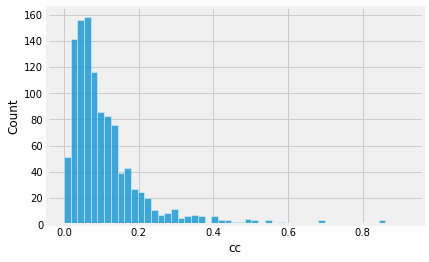

In [108]:
sns.histplot(feature_eval.phik)

###### Distribution of significance values:

<AxesSubplot:xlabel='cc_signif', ylabel='Count'>

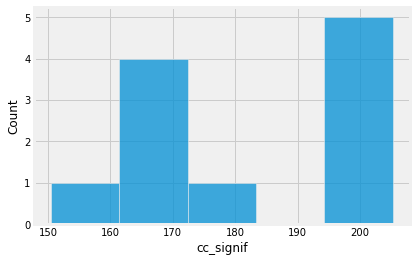

In [107]:
sns.histplot(feature_eval.phik_signif)

In [140]:
feature_eval[feature_eval['phik_signif']>200]

,cc,cc_signif
pairs,,
"(tech_school_after_hs, desire_tech_school)",0.853378,205.246271
"(2yrcoll_after_hs, tech_school_after_hs)",0.693962,201.490563
"(alcohol_lifetime_freq, binary_drug)",0.503510,201.641182
"(alcohol_yr_freq, evr_smoked_cig)",0.414042,204.328780


In [147]:
feature_eval[feature_eval['phik_signif']<180]

,cc,cc_signif
pairs,,
"(desire_4yrcoll, 4yrcoll_after_hs)",0.776309,178.474915
"(tech_school_after_hs, 4yrcoll_after_hs)",0.631231,168.859587
"(cig_month_freq, alcohol_lifetime_freq)",0.496440,170.764672
"(area_type, smsa)",0.463581,169.659827
"(school_missed_ditched, skipped_class)",0.410799,166.408879
"(evr_smoked_cig, alcohol_2weeks)",0.309633,150.490580


In [22]:
col_mask = ['sampling_weight', 'region', 'evr_smoked_cig', 'alcohol_2weeks', '4yrcoll_after_hs', 'work_pay', 
           'has_father', 'avg_grade', 'drive_freq', '12mo_r_tcktd', 'relig_attd', 'rec_time']

In [23]:
history.X_train = history.X_train[col_mask]

In [24]:
lr_fs = LogisticRegression(max_iter=10000, C=0.1)

In [27]:
val_recall, val_prec, val_acc, roc_auc, lr3 = history.kfold_validation(lr_fs, 'LogReg 3 PhikFeatures', ['sampling_weight'], col_mask[1:])

In [38]:
X_tr_mp = pd.read_csv('data/modeling_data/X_train_mp.csv')
y_tr_cm = pd.read_csv('data/modeling_data/y_train_cm.csv')

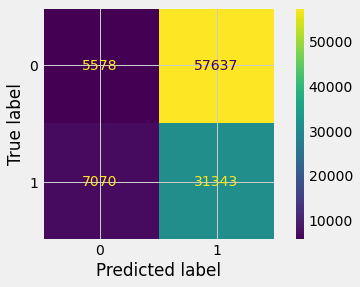

In [41]:
plot_confusion_matrix(lr3, X_tr_mp, y_tr_cm)

In [52]:
dt_fs = DecisionTreeClassifier(criterion='gini', max_depth=15, min_samples_leaf=40)

In [53]:
val_recall, val_prec, val_acc, roc_auc, dt3 = history.kfold_validation(dt_fs, 'DecTree 3 PhikFeatures', ['sampling_weight'], col_mask[1:])

In [58]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score
preds = dt3.predict(X_tr_mp)
recall_score(y_tr_cm, preds)

0.8441413063285866

In [59]:
accuracy_score(y_tr_cm, preds)

0.3688058409099854

In [60]:
roc_auc_score(y_tr_cm,preds)

0.46205325223097055

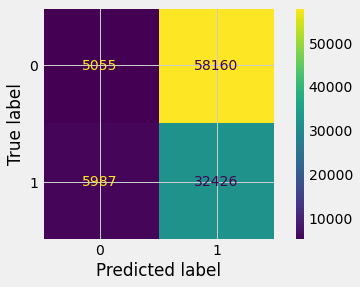

In [54]:
plot_confusion_matrix(dt3, X_tr_mp, y_tr_cm)

##### Time for our RandomForest!

In [25]:
# !pip install boruta

In [26]:
from boruta import BorutaPy

In [43]:
rf_b = RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_leaf=1)

`BorutaPy` is a wrapper for the RandomForest algorithm, that attaches a "randomized" duplicate dataset to the original and ranks the original features. For a great article explaining the process, click [here](https://towardsdatascience.com/boruta-explained-the-way-i-wish-someone-explained-it-to-me-4489d70e154a).

In [110]:
boruta = BorutaPy(
                 estimator = rf_b,
                 n_estimators = 'auto',
                 max_iter = 25, 
                 perc = 80
                 )

In [111]:
boruta.fit(np.array(X_tr_pp), np.array(y_tr_pp))

BorutaPy(estimator=RandomForestClassifier(bootstrap=False, max_depth=20,
                                          n_estimators=67,
                                          random_state=RandomState(MT19937) at 0x7FCE85894440),
         max_iter=25, n_estimators='auto', perc=80,
         random_state=RandomState(MT19937) at 0x7FCE85894440)

Features in the "green area" have passed the maximum shadow feature importance "threshold". The threshold can be adjusted with the param `perc` (percentile). 

Features in the "blue area" are considered to be in the real of uncertainty, and ultimately up to the user to decided whether to keep or discard the feature.

In [113]:
green_area = X_tr_pp.columns[boruta.support_]
blue_area = X_tr_pp.columns[boruta.support_weak_]

In [114]:
print("Columns within Area of Acceptance\n", green_area)
print("Columns within Area of Irresolution\n", blue_area)

Columns within Area of Acceptance
 Index(['x0_2019', 'x1_Midwest', 'x1_NorthEast', 'x1_South', 'x3_0', 'x3_1',
       'x4_1-2x', 'x4_Never', 'x4_Occasionally', 'x4_Regularly Now',
       'x4_Regularly in Past', 'x5_1 Pack', 'x5_1-5 Cigarettes', 'x5_2 Packs',
       'x5_<1 Cigarettes', 'x5_None', 'x6_0', 'x6_1-2X', 'x6_10-19X',
       'x6_20-39X', 'x6_3-5X', 'x6_40+', 'x6_6-9X', 'x7_0', 'x7_1-2X',
       'x7_10-19X', 'x7_20-39X', 'x7_3-5X', 'x7_40+', 'x7_6-9X', 'x8_3-5X',
       'x8_6-9X', 'x8_None', 'x8_Once', 'x8_Twice', 'x9_Female', 'x9_Male',
       'x10_Country', 'x10_Farm', 'x12_No', 'x12_Yes', 'x14_Yes',
       'x15_Graduated HS', 'x16_Graduated HS', 'x17_Yes/Nearly All',
       'x18_Conservative', 'x18_Liberal', 'x18_Very Liberal',
       'x19_Every Week+', 'x19_Never', 'x19_Rarely', 'x20_A Little Important',
       'x20_Not Important', 'x20_Pretty Important', 'x20_Very Important',
       'x21_Above Average', 'x21_Average', 'x22_Average', 'x23_0', 'x24_0',
       'x24_1', 'x25_0

This code here is going to help display the feature rankings in a more readable format.

In [99]:
def label_features():       
    labeled_cols = []
    cols = X_train.drop('sampling_weight', axis=1).columns
    for i in range(len(X_tr_pp.columns)-1):
        ind = X_tr_pp.columns[i].split('_')[0]
        col = X_tr_pp.columns[i]

        if ind == X_tr_pp.columns[i].split('_')[0]:
            labeled_cols.append(cols[int(ind[1:])])
    return labeled_cols

In [116]:
features = list(zip(X_tr_pp.columns, boruta.ranking_, label_features()))
sorted(features, key=lambda x: x[1])

[('x0_2019', 1, 'yr_adminst'),
 ('x1_Midwest', 1, 'region'),
 ('x1_NorthEast', 1, 'region'),
 ('x1_South', 1, 'region'),
 ('x3_0', 1, 'smsa'),
 ('x3_1', 1, 'smsa'),
 ('x4_1-2x', 1, 'evr_smoked_cig'),
 ('x4_Never', 1, 'evr_smoked_cig'),
 ('x4_Occasionally', 1, 'evr_smoked_cig'),
 ('x4_Regularly Now', 1, 'evr_smoked_cig'),
 ('x4_Regularly in Past', 1, 'evr_smoked_cig'),
 ('x5_1 Pack', 1, 'cig_month_freq'),
 ('x5_1-5 Cigarettes', 1, 'cig_month_freq'),
 ('x5_2 Packs', 1, 'cig_month_freq'),
 ('x5_<1 Cigarettes', 1, 'cig_month_freq'),
 ('x5_None', 1, 'cig_month_freq'),
 ('x6_0', 1, 'alcohol_lifetime_freq'),
 ('x6_1-2X', 1, 'alcohol_lifetime_freq'),
 ('x6_10-19X', 1, 'alcohol_lifetime_freq'),
 ('x6_20-39X', 1, 'alcohol_lifetime_freq'),
 ('x6_3-5X', 1, 'alcohol_lifetime_freq'),
 ('x6_40+', 1, 'alcohol_lifetime_freq'),
 ('x6_6-9X', 1, 'alcohol_lifetime_freq'),
 ('x7_0', 1, 'alcohol_yr_freq'),
 ('x7_1-2X', 1, 'alcohol_yr_freq'),
 ('x7_10-19X', 1, 'alcohol_yr_freq'),
 ('x7_20-39X', 1, 'alcohol_yr

In [45]:
rf_b = RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_leaf=1, n_estimators=67)

In [46]:
history.X_train = X_train
history.y_train = y_train

In [48]:
val_recall, val_prec, val_acc, roc_auc, rf3 = history.kfold_validation(rf_b, 'RandFor 3 Boruta', ['sampling_weight'], X_train.drop('sampling_weight', axis=1).columns, feature_mask=True)

In [69]:
print('Recall:')
print(np.mean(history.history['LogReg 1 AllFeatures']['recall']))
print(np.mean(history.history['LogReg 2 AllFeatures']['recall']))
print(np.mean(history.history['LogReg 3 PhikFeatures']['recall']))
print('\nAccuracy:')
print(np.mean(history.history['LogReg 1 AllFeatures']['accuracy']))
print(np.mean(history.history['LogReg 2 AllFeatures']['accuracy']))
print(np.mean(history.history['LogReg 3 PhikFeatures']['accuracy']))

Recall:
0.7053596765006076
0.7092368757779071
0.6273912691106032

Accuracy:
0.800773468046516
0.8015211664123942
0.7740288474019903


In [70]:
print('Recall:')
print(np.mean(history.history['DecTree 1 AllFeatures']['recall']))
print(np.mean(history.history['DecTree 2 AllFeatures']['recall']))
print(np.mean(history.history['DecTree 3 PhikFeatures']['recall']))
print('\nAccuracy:')
print(np.mean(history.history['DecTree 1 AllFeatures']['accuracy']))
print(np.mean(history.history['DecTree 2 AllFeatures']['accuracy']))
print(np.mean(history.history['DecTree 3 PhikFeatures']['accuracy']))

Recall:
0.6137241462122492
0.6785599037040121
0.844

Accuracy:
0.7064097011664019
0.7772956061232417
0.368


In [72]:
print('Recall:')
print(np.mean(history.history['RandFor 1 AllFeatures']['recall']))
print(np.mean(history.history['RandFor 2 AllFeatures']['recall']))
print(np.mean(history.history['RandFor 3 Boruta']['recall']))
print('\nAccuracy:')
print(np.mean(history.history['RandFor 1 AllFeatures']['accuracy']))
print(np.mean(history.history['RandFor 2 AllFeatures']['accuracy']))
print(np.mean(history.history['RandFor 3 Boruta']['accuracy']))

Recall:
0.6917706582624985
0.6911416052617457
0.6926038085203876

Accuracy:
0.7924293047145735
0.7923013342779548
0.7911304407707604


In [81]:
print('XGB Score:\n\n', np.mean(history.history['XGB 1 PhikFeatures']['test_score']))

XGB Score:

 0.766629314


In [87]:
final = LogisticRegression(max_iter=10000, C=0.1)
final.fit(X_tr_pp, y_tr_pp)

LogisticRegression(C=0.1, max_iter=10000)

In [101]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score

In [102]:
tr_preds = final.predict(X_tr_pp)

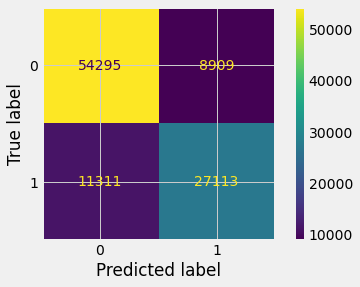

In [88]:
plot_confusion_matrix(final, X_tr_pp, y_tr_pp)

In [104]:
accuracy_score(y_tr_pp, tr_preds)

0.8010390837170859

In [105]:
recall_score(y_tr_pp, tr_preds)

0.7056266916510514

In [90]:
X_te_pp = pd.read_csv('data/modeling_data/X_te_pp.csv')
y_te_pp = pd.read_csv('data/modeling_data/y_te_pp.csv')

In [103]:
te_preds = final.predict(X_te_pp)

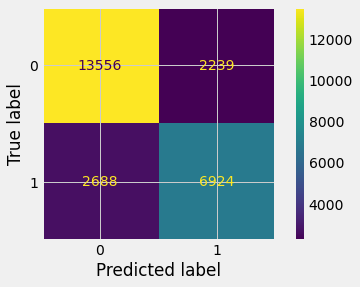

In [91]:
plot_confusion_matrix(final, X_te_pp, y_te_pp)

In [106]:
accuracy_score(y_te_pp, te_preds)

0.8060770653756839

In [107]:
recall_score(y_te_pp, te_preds)

0.7203495630461922

### Feature Importances

###### TOP 3 Postive Features:
* `YEAR=2019` - `1.122`
* `YEAR=2015` - `0.714`
* `Consumed Alcohol 40+ times in the past year` - `0.655`

###### TOP 3 Negative Features:
* `Consumed NO Alcohol in the past year` - `-1.044`
* `Never Smoked Cigarette` - `-1`
* `Grew up on a Farm` - `-0.577`

Features are sorted in ascending order...

In [100]:
features = list(zip(X_tr_pp.columns, final.coef_[0], label_features()))
sorted(features, key=lambda x: x[1])

[('x7_0', -1.0444238919067246, 'alcohol_yr_freq'),
 ('x4_Never', -1.0002862094560194, 'evr_smoked_cig'),
 ('x10_Farm', -0.5769442716134606, 'area_type'),
 ('x6_0', -0.5292576884390817, 'alcohol_lifetime_freq'),
 ('x0_1995', -0.5172839065439283, 'yr_adminst'),
 ('x7_1-2X', -0.4827856151482851, 'alcohol_yr_freq'),
 ('x0_1998', -0.4688949744583935, 'yr_adminst'),
 ('x27_A+', -0.45049541635200846, 'avg_grade'),
 ('x5_None', -0.42471051161853496, 'cig_month_freq'),
 ('x0_1999', -0.41391917672518236, 'yr_adminst'),
 ('x0_1996', -0.40899752439927467, 'yr_adminst'),
 ('x0_2000', -0.4074725664497595, 'yr_adminst'),
 ('x0_1997', -0.3904223239703652, 'yr_adminst'),
 ('x18_Very Conservative', -0.3901011549128239, 'political_value_type'),
 ('x26_0', -0.323227102650196, 'skipped_class'),
 ('x6_1-2X', -0.28232717574067656, 'alcohol_lifetime_freq'),
 ('x27_A-', -0.27054340887020634, 'avg_grade'),
 ('x24_0', -0.26408151037198024, 'school_missed_ditched'),
 ('x8_None', -0.2575588733897159, 'alcohol_2wee

## Conclusions

### Next Steps
* Further subsetting of the dataset and experimentation with XGBoost hyperparameter tuning.
* Implementing Recursive Feature Elimination.
* Using a Neural Network.

### Sources